# Seattle Home Sales Analysis
#### By Eldrich Ver Doyogan and Alexis Kedo

## Overview

Opendoor Technologies Inc is an online company for transacting in residential estate. Headquarted in San Fransisco, the company allows for instant cash offers on homes through an online process and makes repairs on properties purchased in order to reslist them for sale. This data analysis aims to create a foundational understanding as the company continues to expand its geographical reach. The data used in this analysis is the King County House Sales dataset from Seattle, Washington. The method by which we analyzed the data is multiple regression. We aimed to see which factors impact sale prices most, so that Opendoor may shift their focus to key criteria. 

## Business Understanding

Housing demand has risen in 2021 despite the global battle against the pandemic. In order to meet this demand, Opendoor wants to acertain which features of properties affect sales prices most. Properties which possess qualities that bring prices up should be top priority for the company; qualities which this analysis aims to uncover.

## Data Understanding

The data is the King County House Sales dataset from Seattle, Washington that catalogs homes sold between May 2014 and May 2015. It initially contains 20 columns. These columns are: 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', and 'sqft_lot15'. The descriptions for the columns can be found in the folder named data, in the file named column_names.md within this notebook. There are 21597 entries prior to data cleaning. 

### Targets and Predictors

The target we are trying to predict is the price. Every other column is assessed for relevance. Predictors which we deemed less important are discarded. New features which combine data from multiple columns are included in order to create a robust picture of how these independent variables affect sale prices. 

### Checking Assumptions

This analysis uses Multiple Regression in order to predict property sales prices. Using this model requires checking the assumptions of regression. These assumptions are: 
- Linear relationship (model can draw a line of best fit for predicting price)
- Multivariate normality (predictors are normally distributed)
- No or little multicollinearity (predictors do not exhibit a linear relationship with one another)
- Homoscedasticity (residuals have a constant variance) 

## Importing Data and Initial Look

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
import pylab
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
import functions as fn

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)


In [2]:
cd data

/Users/eldrichvergarciadoyogan/Documents/Flatiron/Projects/Seattle-Home-Sales-Dataset-Analysis/data


In [3]:
data_f = pd.read_csv('kc_house_data.csv')
data = pd.read_csv('kc_house_data.csv')

In [4]:
data_f.describe()

id        price  bedrooms  bathrooms  sqft_living  \
count        21,597.00    21,597.00 21,597.00  21,597.00    21,597.00   
mean  4,580,474,287.77   540,296.57      3.37       2.12     2,080.32   
std   2,876,735,715.75   367,368.14      0.93       0.77       918.11   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,049,175.00   322,000.00      3.00       1.75     1,430.00   
50%   3,904,930,410.00   450,000.00      3.00       2.25     1,910.00   
75%   7,308,900,490.00   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition     grade  \
count    21,597.00 21,597.00   19,221.00 21,534.00  21,597.00 21,597.00   
mean     15,099.41      1.49        0.01      0.23       3.41      7.66   
std      41,412.64      0.54        0.09      0.77       0.65      1.17   
min         520.00      1.00        0.00      0.00       1.00      3.00   
25%       5,040.00      1.00        0.00      0.00       3.00      7.00   
50%       7,618.00      1.50        0.00      0.00       3.00      7.00   
75%      10,685.00      2.00        0.00      0.00       4.00      8.00   
max   1,651,359.00      3.50        1.00      4.00       5.00     13.00   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21,597.00 21,597.00     17,755.00 21,597.00 21,597.00 21,597.00   
mean     1,788.60  1,971.00         83.64 98,077.95     47.56   -122.21   
std        827.76     29.38        399.95     53.51      0.14      0.14   
min        370.00  1,900.00          0.00 98,001.00     47.16   -122.52   
25%      1,190.00  1,951.00          0.00 98,033.00     47.47   -122.33   
50%      1,560.00  1,975.00          0.00 98,065.00     47.57   -122.23   
75%      2,210.00  1,997.00          0.00 98,118.00     47.68   -122.12   
max      9,410.00  2,015.00      2,015.00 98,199.00     47.78   -121.31   

       sqft_living15  sqft_lot15  
count      21,597.00   21,597.00  
mean        1,986.62   12,758.28  
std           685.23   27,274.44  
min           399.00      651.00  
25%         1,490.00    5,100.00  
50%         1,840.00    7,620.00  
75%         2,360.00   10,083.00  
max         6,210.00  871,200.00

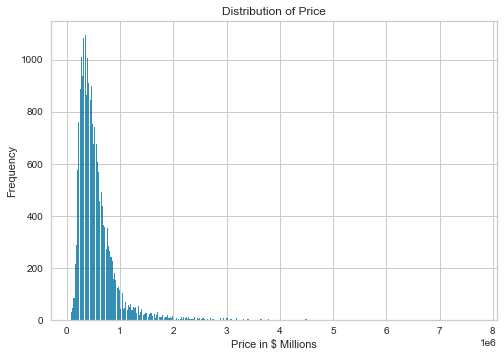

In [5]:
plt.hist(x = data_f.price, bins = 'auto', alpha = 0.80, rwidth= .85)
plt.xlabel('Price in $ Millions')
plt.ylabel('Frequency')
plt.title('Distribution of Price');

In [6]:
#Convert "date" column into datetime format
data['date']= pd.to_datetime(data['date'])
# Grab year from date column
data['year_of_sale'] = pd.DatetimeIndex(data['date']).year
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221,900.00         3       1.00         1180   
1  6414100192 2014-12-09 538,000.00         3       2.25         2570   
2  5631500400 2015-02-25 180,000.00         2       1.00          770   
3  2487200875 2014-12-09 604,000.00         4       3.00         1960   
4  1954400510 2015-02-18 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650    1.00         nan  0.00          3      7        1180   
1      7242    2.00        0.00  0.00          3      7        2170   
2     10000    1.00        0.00  0.00          3      6         770   
3      5000    1.00        0.00  0.00          5      7        1050   
4      8080    1.00        0.00  0.00          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0           0.0      1955          0.00    98178 47.51 -122.26           1340   
1         400.0      1951      1,991.00    98125 47.72 -122.32           1690   
2           0.0      1933           nan    98028 47.74 -122.23           2720   
3         910.0      1965          0.00    98136 47.52 -122.39           1360   
4           0.0      1987          0.00    98074 47.62 -122.05           1800   

   sqft_lot15  year_of_sale  
0        5650          2014  
1        7639          2014  
2        8062          2015  
3        5000          2014  
4        7503          2015

In [7]:
# Taking a closer look at our target variable, sales price
bins=[0,100000,300000,500000,900000,2000000,7000000]
choices =['$0-$100k','$100k-$300k','$400k-$500k','$600k-$900k','$1mlln-$2mlln','$2mlln-$7mlln']
data['price_range']=pd.cut(data['price'],bins=bins,labels=choices)

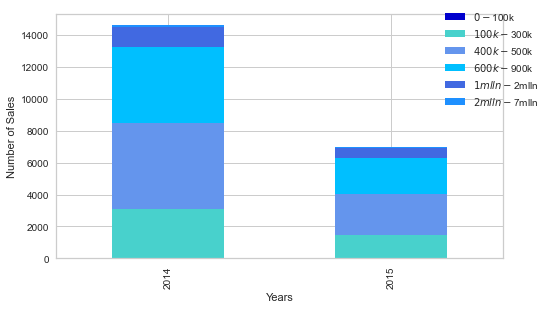

In [8]:
plt.rcParams["figure.figsize"] = [8,4.5]
ax = data.groupby(['year_of_sale','price_range']).size().unstack().plot.bar(stacked=True, color=['mediumblue','mediumturquoise','cornflowerblue','deepskyblue','royalblue','dodgerblue'])
horiz_offset = 1
vert_offset = 1
ax.set_xlabel('Years')
ax.set_ylabel('Number of Sales')
ax.legend(bbox_to_anchor=(1.1, 1.05));

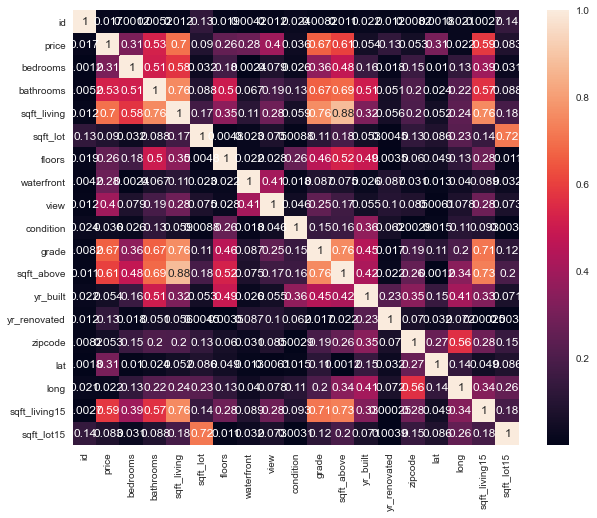

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data_f.corr().abs(), annot=True)
plt.show();

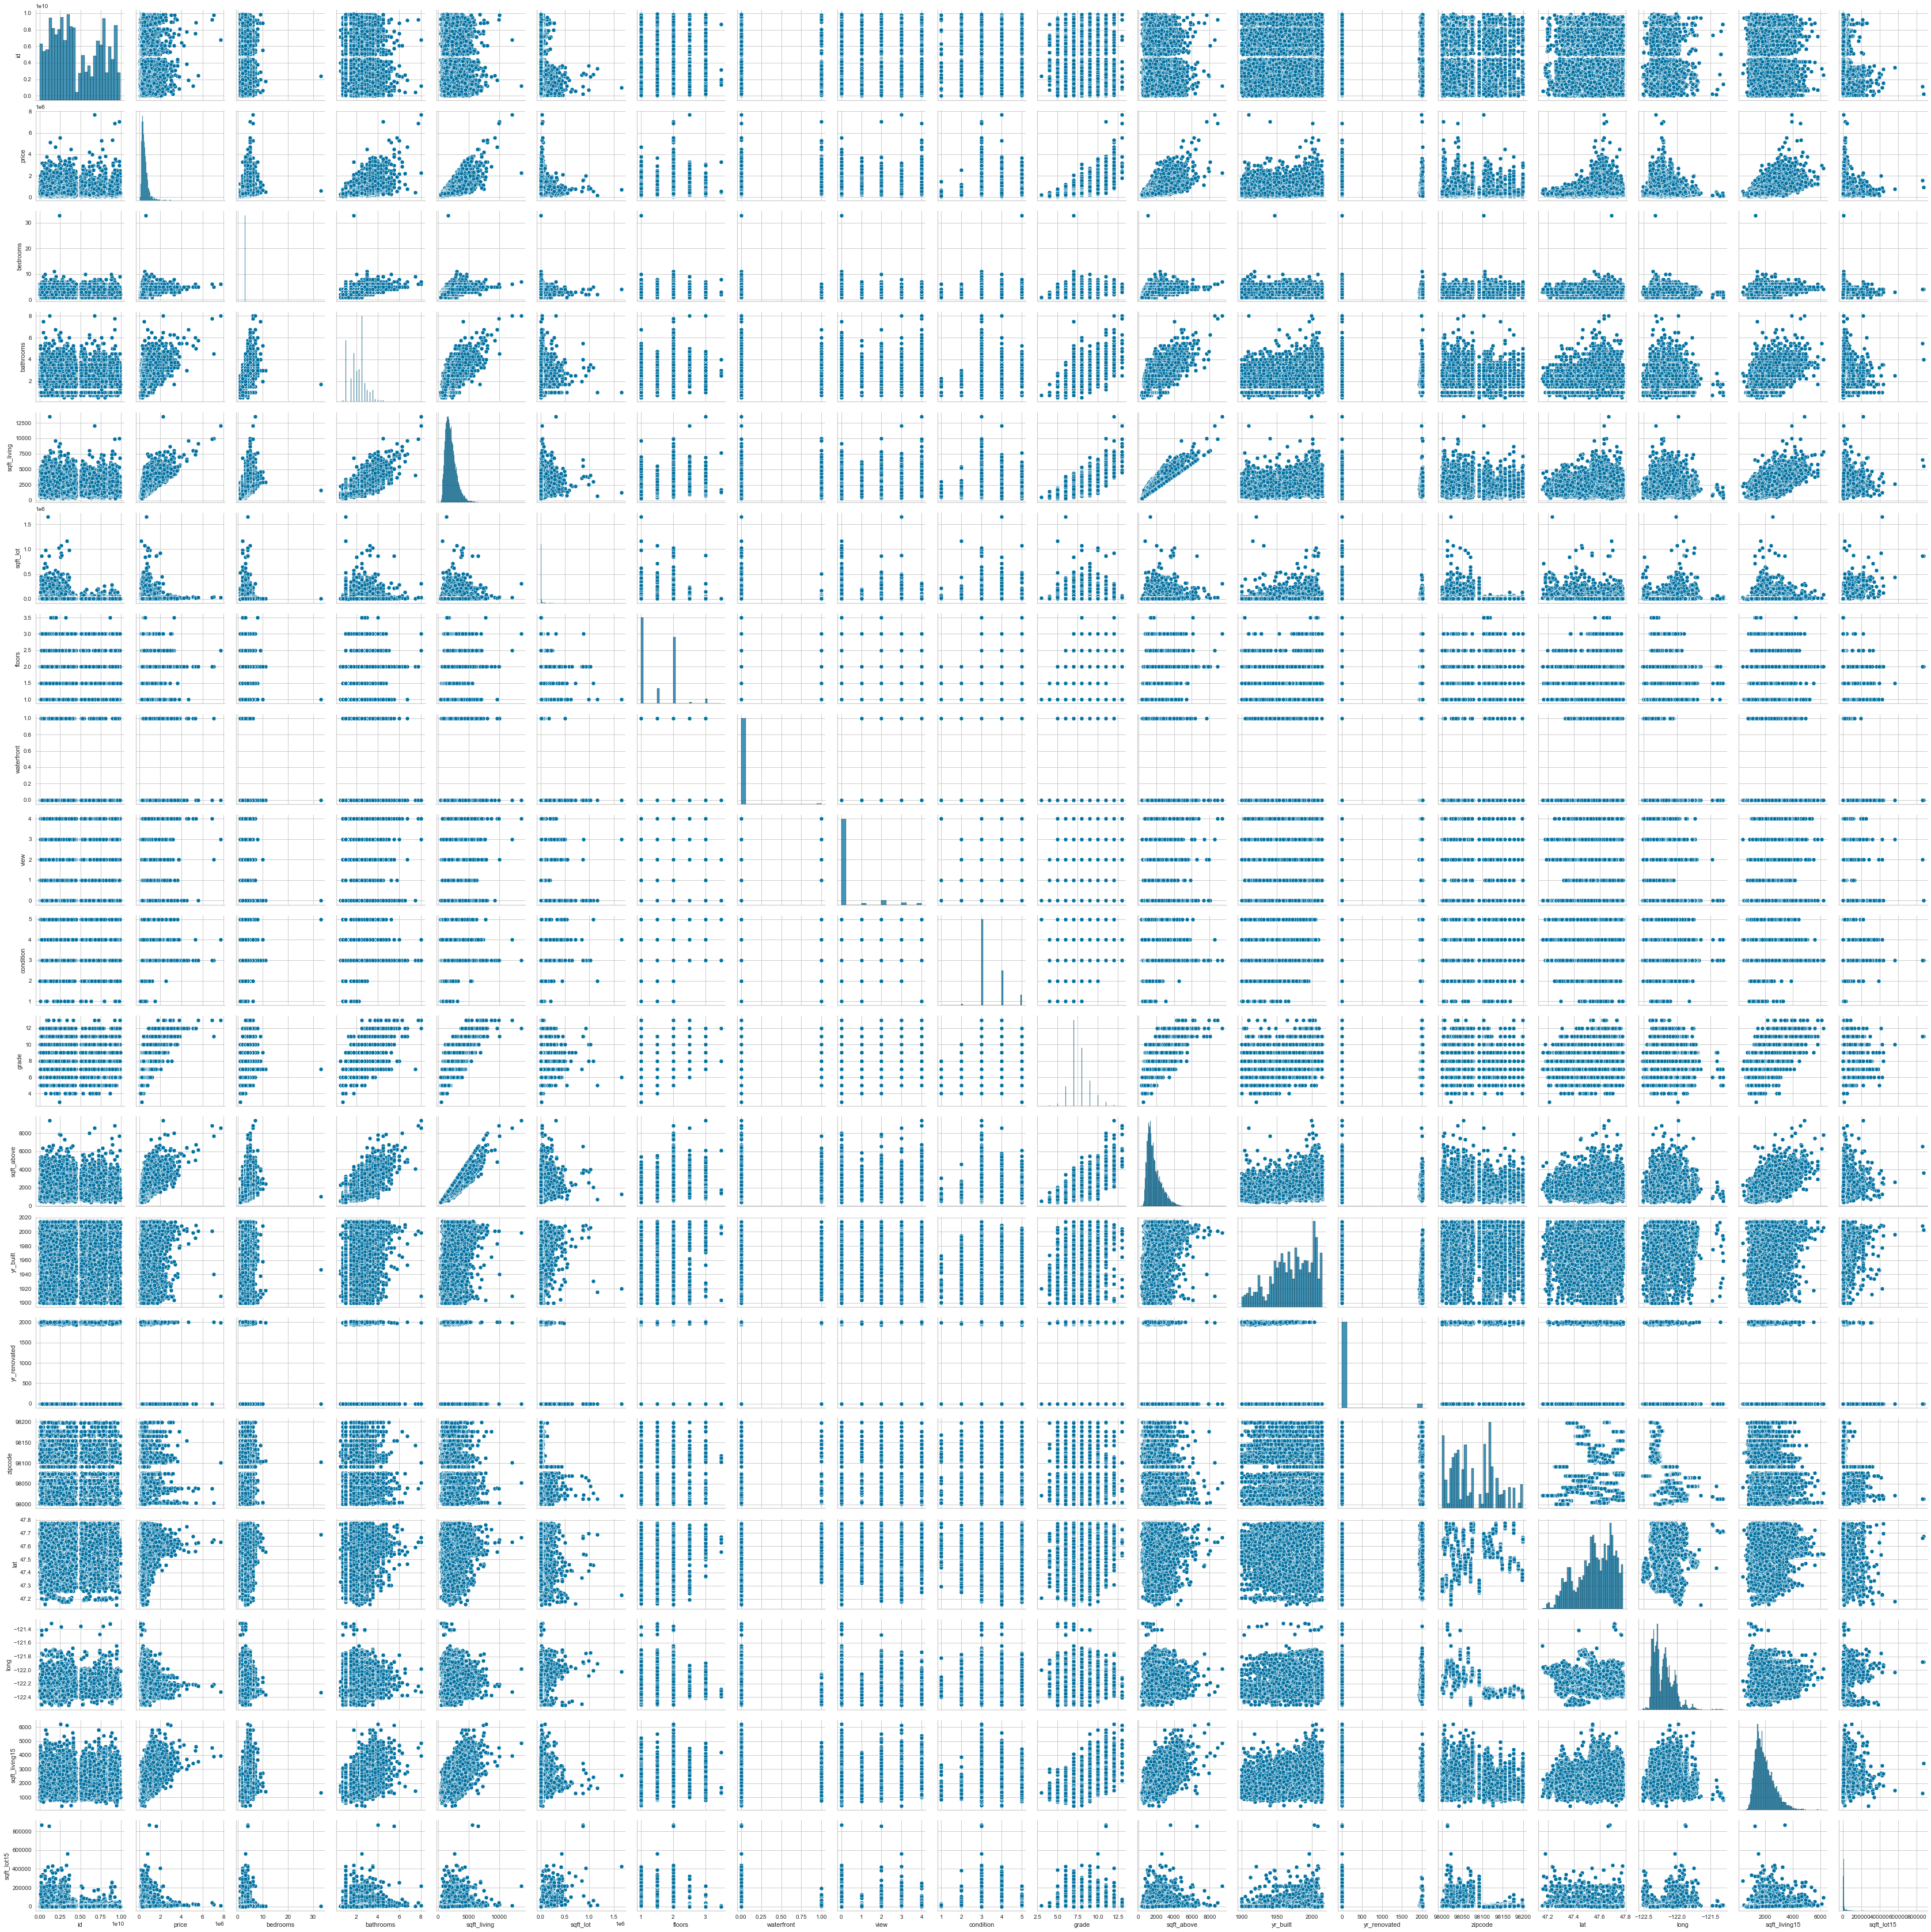

In [10]:
sns.pairplot(data_f)

## Data Preparation and Cleaning

This step discards outliers and data entries which were cataglogued with clear mistakes.

In [11]:
to_drop = ['id', 'view', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'date', 'yr_built' ]

In [12]:
data_f.drop(to_drop, axis = 1, inplace = True)

In [13]:
data_f.waterfront.fillna(0.0, inplace = True)
data_f.yr_renovated.fillna(value = 0, inplace = True)
data_f.loc[(data_f.yr_renovated > 0), 'yr_renovated'] = 1
bedroom_outlier = data_f.loc[data_f['bedrooms'] == 33].index
data_f.drop(bedroom_outlier, axis = 0,  inplace = True)
price_outlier = data_f.loc[data_f['price'] == data_f.price.max()].index
data_f.drop(price_outlier, axis = 0,  inplace = True)
sqft_lot_outlier = data_f.loc[data_f['sqft_lot'] == data_f.sqft_lot.max()].index
data_f.drop(sqft_lot_outlier, axis = 0,  inplace = True)
bathrooms_outlier = data_f.loc[data_f['bathrooms'] == data_f.bathrooms.max()].index
data_f.drop(bathrooms_outlier, axis = 0,  inplace = True)

In [14]:
data_f = data_f.loc[data_f.price <= (data_f.price.mean() + (2 * data_f.price.std()))]

---------------

In [15]:
# Dropping some columns that look less promising
# df.drop(['B', 'C'], axis=1, inplace=True) <-- to make the change the df itself , use inplace=True
to_drop = ['id', 'date', 'view', 'sqft_above', 'lat', 'long', 'sqft_lot15', 'sqft_basement', 'waterfront','yr_renovated', 'price_range', 'year_of_sale']

In [16]:
data.drop(to_drop, axis = 1, inplace = True)

In [17]:
# Drop one really obvious outlier that was clearly a data entry error
mask = data.loc[data['bedrooms']>20].index
data.drop(mask, axis = 0, inplace=True)

## Modeling Process

### Initial Findings

#### Ordinal Encoding Categorical Data (Eldrich)

In [18]:
def boxit(DataFrame, independent, dependent):
    """ Returns boxplot of chosen independent column and dependent column.
        
        Parameters:
        DataFrame: A Pandas DataFrame
        Independent: Column or feature from dataframe to be chosen as the predictor variable
        Dependent: Column to be predicted
        """
    ax = sns.boxplot(data = DataFrame, x = independent, y = dependent)
    return

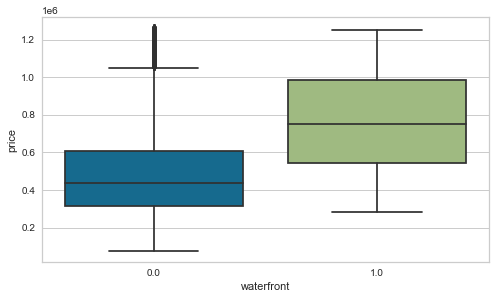

In [19]:
boxit(data_f, 'waterfront', 'price')

# The interquartile range of waterfront properties (marked as 1.0 on boxplot) is larger thus 
# the range of price for the middle half of waterfront properties is also larger

# The upper quartile of waterfront properties is more expensive while its lower quartile is 
# around the same price as the upper quartile of non-waterfront properties

# Both maximum and minimum values (denoted by the boxplot's whiskers) are higher respectively 
# for waterfront properties

# Non-waterfront properties have extreme outliers

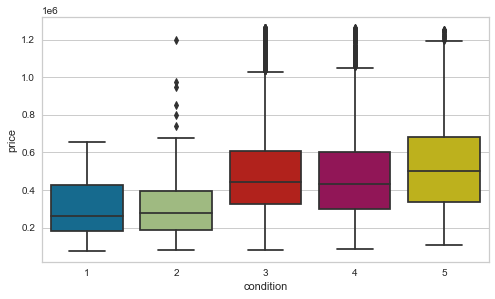

In [20]:
boxit(data_f, 'condition', 'price')

# Properties' condition don't appear to show high correlation with price, with each condition
# posting relatively similar price ranges. 

# It does appear that outliers peak at condition-3 

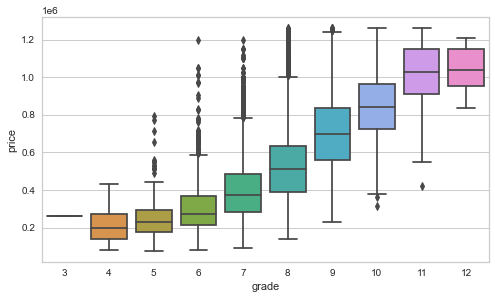

In [21]:
boxit(data_f, 'grade', 'price')

# There is a rising pattern in prices as the grade of properties go up, this can certainly 
# be an indicator of a linear relationship between property grade and price. 

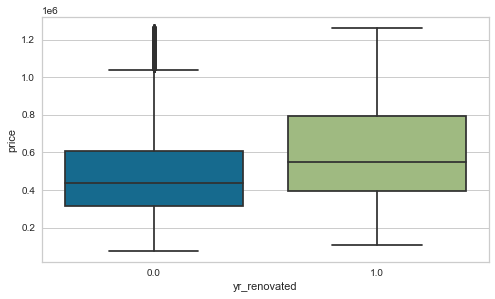

In [22]:
boxit(data_f, 'yr_renovated', 'price')
# The price range difference between either renovated or not does not seem to affect the price as much. 
# Most likely a low coefficient 

In [23]:
X_ = data_f.drop('price', axis = 1)
y_ = data_f.price
X_Train, X_Test, y_Train, y_Test = train_test_split(X_, y_, test_size = 0.2, random_state = 42)

In [24]:
#Creating a function to turn datatypes as category
def cat(df, cat_data):
    """Turns desired features of dataframe into categorical data.
    
        Parameters:
        df(DataFrame): Pandas DataFrame from which to pull columns
        cat_data(list): list object that specifies column names"""
    for feature in list(df.columns):
        if feature in cat_data:
            df[feature] = df[feature].astype('category')
    return

In [25]:
categories = ['condition', 'grade', 'waterfront', 'yr_renovated']
# Listing which columns I would like to run through my cat function

cat(X_Train, categories)
cat(X_Test, categories)
# Running train and test independent variables through cat

dummy_train = pd.get_dummies(X_Train[categories], drop_first = True )
dummy_test =  pd.get_dummies(X_Test[categories], drop_first = False )
dummy_test.drop(['condition_1', 'waterfront_0.0', 'yr_renovated_0.0'],
                   axis = 1, inplace = True)

<ipython-input-24-d16a2ec9fcf2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype('category')


In [26]:
X_Train = X_Train.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1)
X_Test = X_Test.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1)

#### Working with Location Data (Alexis)


To engineer a location feature, I chose to use the median price for each individual zip code. Zip code is a categorical feature, which is oftentimes dealt with through one-hot encoding. However, given the many unique zip codes present in the dataset (70), I was concerned that adding 70 additional variables to my dataset would increase the dimensionality to a point that decreases the reliability of the model.

Therefore, using the median price for each zip code seemed like an appropriate proxy and could be a reasonably good predictor of future home prices for that area.

In [27]:
X = data.drop(['price'], axis=1)
y = data[['price']]

# split data 80% training and 20% test w/ random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [28]:
traindf = X_train.copy()
testdf = X_test.copy()

In [29]:
traindf['price'] = y_train
testdf['price'] = y_test

In [30]:
# Replace all values in zipcode column with median sale price 
# 1. Group all zipcodes together with median average sale price 
# 2. Replace any zipcode value corresponding to a particular zip code 
# with its median average sales price 
zip_group = traindf.groupby(['zipcode']).median()

In [31]:
test_zip_group = testdf.groupby(['zipcode']).median()

In [32]:
zip_group = zip_group['price'].reset_index()

In [33]:
# Join zip_group with train df
joined_zip = pd.merge(zip_group, traindf, how = 'inner', on='zipcode').reset_index()

In [34]:
# Join zip_group with test df 
joined_test_zip = pd.merge(zip_group, testdf, how='inner', on='zipcode').reset_index()

#### Link to Zipcode / Median Map 
https://nbviewer.jupyter.org/github/alexiskedo/Seattle-Home-Sales-Dataset-Analysis/blob/Kedo/data/zipcode_price_map.html

### Refinement Results

#### Ordinal Data with Continuous Data 

In [35]:
# In order to address the collinearity between sqft_living and bedroom, I decided to combine them to show 
# the amount of square footage of the living area in comparison to the bedroom count, while also dropping 
# the bedroom column. 
# For later iteration
Sqft_Bed_Train = (X_Train.sqft_living / X_Train.bedrooms)
Sqft_Bed_Test = (X_Test.sqft_living / X_Test.bedrooms)

In [36]:
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
for feature in variables:
    X_Train[feature] = X_Train[feature].map(lambda x: np.log(x))
for feature in variables:
    X_Test[feature] = X_Test[feature].map(lambda x: np.log(x))

In [37]:
X_Train = X_Train.join(dummy_train)

In [38]:
X_Test = X_Test.join(dummy_test)

In [39]:
SS = StandardScaler()
X_Train_Scaled = SS.fit_transform(X_Train)
X_Test_Scaled = SS.transform(X_Test)

In [40]:
regression = LinearRegression()
regression.fit(X_Train_Scaled, y_Train)

LinearRegression()

In [41]:
train_y_m5 = regression.predict(X_Train_Scaled)
test_y_m5 = regression.predict(X_Test_Scaled)

In [42]:
print('Coefficients: ', X_Train.columns, regression.coef_)
print('Intercept: ', regression.intercept_)
print('------')
print('R2 Train: ', r2_score(y_Train, train_y_m5))
print('MAE Train: ', mean_absolute_error(y_Train, train_y_m5))
print('--------')
print('R2 Test: ', r2_score(y_Test, test_y_m5))
print('MAE Test: ', mean_absolute_error(y_Test, test_y_m5))

Coefficients:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'waterfront_1.0', 'yr_renovated_1.0'],
      dtype='object') [-15448.80364305 -18105.9178347  100280.87618276 -25739.94660245
  -6368.89888623   2178.17566266  10634.6890339   30401.11427399
  35542.24109567    766.86608881  -3839.73501146  -6318.59921416
  13266.99205161  53389.9088463   81820.54370506  75118.35133498
  49227.09444407   9458.20613458  15287.41959487  20065.39954788]
Intercept:  486347.5015067501
------
R2 Train:  0.5270359456577862
MAE Train:  119905.4070987889
--------
R2 Test:  0.5225543614282906
MAE Test:  118652.80967262997


The coefficients of the model include negative coefficients. This might be explained by the various independent variables interacting with each other that could affect the model's prediction on the dependent variable. I will address this in later models

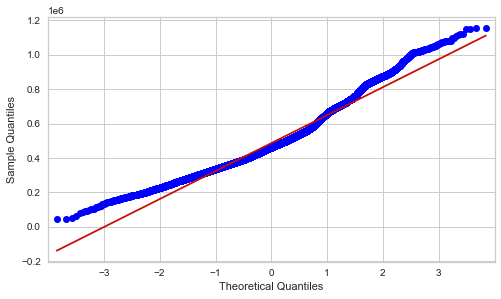

In [43]:
sm.qqplot(train_y_m5, line = 's')
pylab.show()

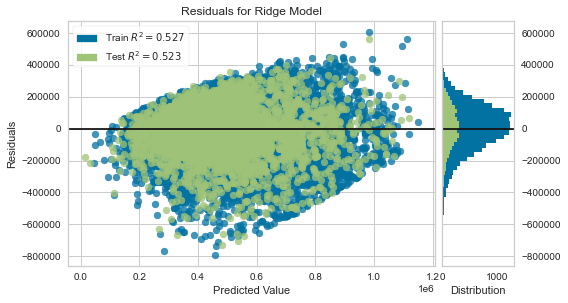

In [44]:
model5 = Ridge()
visualizer = ResidualsPlot(model5)

visualizer.fit(X_Train, y_Train)  
visualizer.score(X_Test, y_Test) 
visualizer.show();

#### Location Data 

In [45]:
# Rename price_x column as median price per zipcode 
joined_zip = joined_zip.rename(columns={"price_x": "med_price_for_zip"})

In [46]:
# Drop zipcode and index columns
trained_zip = joined_zip.drop(['index', 'zipcode'], axis=1)

In [47]:
# Do the same with test data
test_zip = joined_test_zip.rename(columns={"price_x": "med_price_for_zip"})

In [48]:
test_zip = joined_test_zip.drop(['index', 'zipcode'], axis=1)

In [49]:
# Divide data in to x predictors and y targets 
# divide dataset into X predictors and y target
X_test_zip = test_zip.drop(['price_y'], axis=1)
y_test_zip = test_zip[['price_y']]

X_trained_zip = trained_zip.drop(['price_y'], axis=1)
y_trained_zip = trained_zip[['price_y']]

In [50]:
scaler = StandardScaler()

In [51]:
# Instantiate a linear regression model
lr = LinearRegression()

In [52]:
# Train our scaler on training data, then fit to testing
X_trained_zip_scaled = scaler.fit_transform(X_trained_zip)
X_test_zip_scaled = scaler.transform(X_test_zip)

In [53]:
# Fit our model on our scaled data
lr.fit(X_trained_zip_scaled, y_trained_zip)

LinearRegression()

In [54]:
# Evaluate
y_train_pred = lr.predict(X_trained_zip_scaled)
y_test_pred = lr.predict(X_test_zip_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_trained_zip, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_trained_zip, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test_zip, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_zip, y_test_pred)}")

Training Scores:
R2: 0.7363291865117058
Mean Absolute Error: 112465.36617955659
---
Testing Scores:
R2: 0.7229711101210686
Mean Absolute Error: 111841.20169660255


- A little better than our FSM
- Training now higher than testing, which is an indication of overfitting
- MAE went down slightly which is a good sign
- MAE a little less than half of one standard deviation

### Final Model Results 

#### Ordinal Data with Continuous Data 

In [55]:
X_Train['Sqft_Bed'] = Sqft_Bed_Train
X_Test['Sqft_Bed'] = Sqft_Bed_Test

In [56]:
X_Train['Sqft_Bed'] = X_Train['Sqft_Bed'].map(lambda x: np.log(x))

In [57]:
X_Test['Sqft_Bed'] = X_Test['Sqft_Bed'].map(lambda x: np.log(x))

In [58]:
# This model drops the dummy variables in condition for we saw that they did not affect price in the boxplots above
conditions = ['condition_2', 'condition_3', 'condition_4', 'condition_5']
X_Train.drop(conditions, axis = 1, inplace = True)

In [59]:
X_Test.drop(conditions, axis = 1, inplace = True)

In [60]:
# This model droops the columns below to address the problem of discussed above. 
# The negative coefficients should disappear by removing these columns.

to_be_drop = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'grade_4', 'grade_5', 'grade_6', 'grade_7']

In [61]:
X_Train.drop(to_be_drop, axis = 1, inplace = True)
X_Test.drop(to_be_drop, axis = 1, inplace = True)

In [62]:
SS = StandardScaler()
X_Train_Scaled = SS.fit_transform(X_Train)
X_Test_Scaled = SS.transform(X_Test)

In [63]:
regression = LinearRegression()
regression.fit(X_Train_Scaled, y_Train)

LinearRegression()

In [64]:
regression = LinearRegression()
regression.fit(X_Train_Scaled, y_Train)

LinearRegression()

In [65]:
train_y_m8 = regression.predict(X_Train_Scaled)
test_y_m8 = regression.predict(X_Test_Scaled)

In [66]:
y_Train.describe()

count      16,592.00
mean      486,347.50
std       223,796.16
min        78,000.00
25%       316,000.00
50%       440,000.00
75%       611,000.00
max     1,260,000.00
Name: price, dtype: float64

In [67]:
print('Coefficients: ', list(zip(X_Train.columns, regression.coef_)))
print('Intercept: ', regression.intercept_)
print('------')
print('R2 Train: ', r2_score(y_Train, train_y_m8))
print('MAE Train: ', mean_absolute_error(y_Train, train_y_m8))
print('--------')
print('R2 Test: ', r2_score(y_Test, test_y_m8))
print('MAE Test: ', mean_absolute_error(y_Test, test_y_m8))

Coefficients:  [('sqft_living', 66598.15220721008), ('grade_8', 38170.81363473664), ('grade_9', 65540.2365379287), ('grade_10', 62113.74173073616), ('grade_11', 41769.45318483209), ('grade_12', 8400.784971161), ('waterfront_1.0', 14229.748409030437), ('yr_renovated_1.0', 17858.112747170882), ('Sqft_Bed', 15458.911889925606)]
Intercept:  486347.5015067502
------
R2 Train:  0.4924816834305994
MAE Train:  124867.0891134175
--------
R2 Test:  0.49426375885604323
MAE Test:  122451.41472887575


The mean absolute error is higher than previous models, and the R2 is lower, however, the coefficients now are able to predict the price without showing the relationship to be inverse. I suspect the categorical variables lowering the R2.

- 1 standard deviation above the mean for sqft_living raises the price by ~6659 dollars
- Grades 9 and 10 seem to drive up the prices siginificantly more than grades 11 and 12. Buyers may want a lower 'grade' because higher grading may indicate a more specific look/style which may turn off potential buyers.
- Waterfront houses also raise the value of the property, albeit not significantly
- Houses which are renovated raise the value of the property by ~ 17858 dollars at one standard deviation above the mean.
- Similarly, Sqft_Bed raises the price at ~ 15458 dollars at 1 standard deviation from the mean

#### Location Data

In [68]:
non_normal = ['med_price_for_zip', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition', 'yr_built', 'sqft_living15', 'price_y']

In [69]:
for feat in non_normal:
    trained_zip[feat] = trained_zip[feat].map(lambda x: np.log(x))
#pd.plotting.scatter_matrix(x_cols, figsize=(10,12));

In [70]:
non_normal_test = ['price_x', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition', 'yr_built', 'sqft_living15', 'price_y']

In [71]:
for feat in non_normal_test:
    test_zip[feat] = test_zip[feat].map(lambda x: np.log(x))
#pd.plotting.scatter_matrix(x_cols_test, figsize=(10,12));

In [72]:
# Divide data in to x predictors and y targets 
X_test_2 = test_zip.drop(['price_y'], axis=1)
y_test_2 = test_zip[['price_y']]

X_train_2 = trained_zip.drop(['price_y'], axis=1)
y_train_2 = trained_zip[['price_y']]

In [73]:

# Train our scaler on training data, then fit to testing
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

In [74]:

# Fit our model on our scaled data
lr.fit(X_train_2_scaled, y_train_2)

LinearRegression()

In [75]:
y_train_2_pred = lr.predict(X_train_2_scaled)
y_test_2_pred = lr.predict(X_test_2_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train_2, y_train_2_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_2, y_train_2_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test_2, y_test_2_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_2, y_test_2_pred)}")

Training Scores:
R2: 0.82671349418667
Mean Absolute Error: 0.1645997033759281
---
Testing Scores:
R2: 0.8227638239724818
Mean Absolute Error: 0.16450586856045463


In [76]:
#now to print MAE in terms of $$ and not logged price, function provided by Lindsey and is imported from py file
fn.print_metrics(y_train_2, y_train_2_pred, y_test_2, y_test_2_pred, log=True)

Training Scores
----------
R2: 0.8267
RMSE: 174228.1287
MAE: 94313.9688

**********
Testing Scores
----------
R2: 0.8228
RMSE: 180291.1385
MAE: 93459.3011


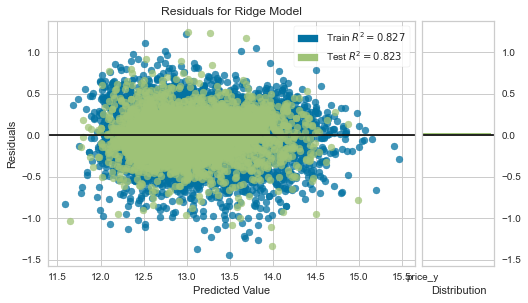

In [77]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_2_scaled, y_train_2)  # Fit the training data to the visualizer
visualizer.score(X_test_2_scaled, y_test_2)  # Evaluate the model on the test data
visualizer.show();

## Evaluation 

#### Ordinal Data with Continuous Data 

In [78]:
pd.DataFrame(X_Train).corr(method='pearson')

sqft_living  grade_8  grade_9  grade_10  grade_11  grade_12  \
sqft_living              1.00     0.19     0.37      0.30      0.19      0.03   
grade_8                  0.19     1.00    -0.23     -0.13     -0.06     -0.01   
grade_9                  0.37    -0.23     1.00     -0.08     -0.04     -0.01   
grade_10                 0.30    -0.13    -0.08      1.00     -0.02     -0.00   
grade_11                 0.19    -0.06    -0.04     -0.02      1.00     -0.00   
grade_12                 0.03    -0.01    -0.01     -0.00     -0.00      1.00   
waterfront_1.0           0.00     0.00     0.00     -0.00     -0.01     -0.00   
yr_renovated_1.0         0.03     0.02     0.00     -0.02     -0.01     -0.00   
Sqft_Bed                 0.72     0.16     0.32      0.29      0.17      0.03   

                  waterfront_1.0  yr_renovated_1.0  Sqft_Bed  
sqft_living                 0.00              0.03      0.72  
grade_8                     0.00              0.02      0.16  
grade_9                     0.00              0.00      0.32  
grade_10                   -0.00             -0.02      0.29  
grade_11                   -0.01             -0.01      0.17  
grade_12                   -0.00             -0.00      0.03  
waterfront_1.0              1.00              0.08      0.04  
yr_renovated_1.0            0.08              1.00      0.04  
Sqft_Bed                    0.04              0.04      1.00

No strong correlation between independent variables with the exception of Sqft_Bed and sqft_living. This is almost certainly due to the former being a derivitive of the latter. 

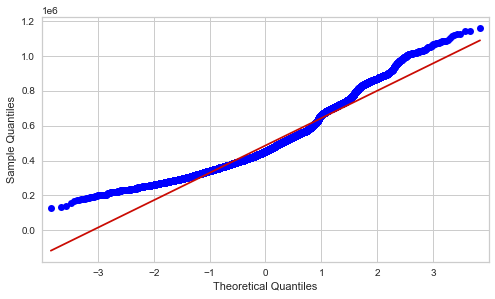

In [79]:
sm.qqplot(train_y_m8, line = 's')
pylab.show()

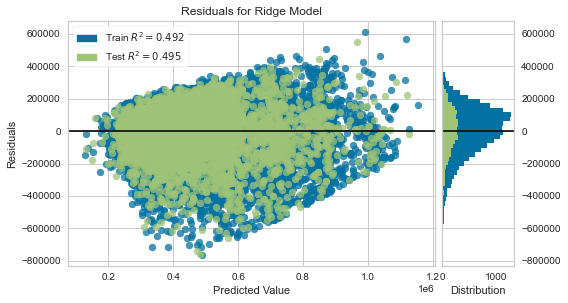

In [80]:
model8 = Ridge()
visualizer = ResidualsPlot(model8)

visualizer.fit(X_Train, y_Train)  
visualizer.score(X_Test, y_Test) 
visualizer.show();

/Users/eldrichvergarciadoyogan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


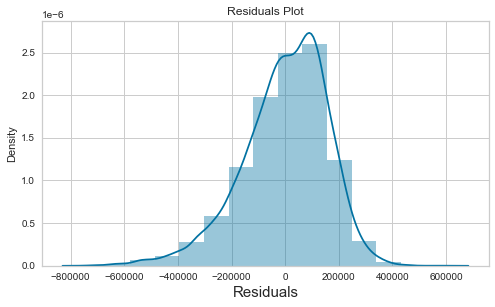

In [81]:
sns.distplot(train_y_m8 - y_Train, bins = 15)
plt.xlabel('Residuals', fontsize = 15)    
plt.title('Residuals Plot')
plt.show();

The model appeared to have suffered from the inclusion of categorical data, with only a little under 50% of the data variance being accounted for. This may have been because certain variables were sparse (waterfront and yr_renovated). The Mean Absolute Error is about 25% larger than Alexis' MAE value.  

In [103]:
coef = pd.DataFrame(zip(X_Train.columns, regression.coef_))
coef

0         1
0       sqft_living 66,598.15
1           grade_8 38,170.81
2           grade_9 65,540.24
3          grade_10 62,113.74
4          grade_11 41,769.45
5          grade_12  8,400.78
6    waterfront_1.0 14,229.75
7  yr_renovated_1.0 17,858.11
8          Sqft_Bed 15,458.91

The coefficients show that sqft_living and grades 9 and 10 impacted the sales price the most. Furthermore, waterfront, renovated, and footage living per number of bedroom seem to affect the price similarly. 

#### Location Data 

In [82]:
# Adding new column to training data from Model 2 
trained_zip['sqft_living_ratio'] = trained_zip['sqft_living']/trained_zip['sqft_living15']

In [83]:
model_3_train = trained_zip

# Do the same for testing data from Model 2 
test_zip['sqft_living_ratio'] = test_zip['sqft_living']/test_zip['sqft_living15']

In [84]:
model_3_test = test_zip

In [85]:
# What percentage of the homes' square footage is identical to their neighbors'? 
len(model_3_train[model_3_train['sqft_living_ratio']==1]) / len(model_3_train)

0.11860384348228757

Only about 12% of homes are in neighborhoods with identical home sizes. There doesn't seem to be a ton of tract housing in Seattle - since this is a fairly small percentage of my data, I'll keep these in.

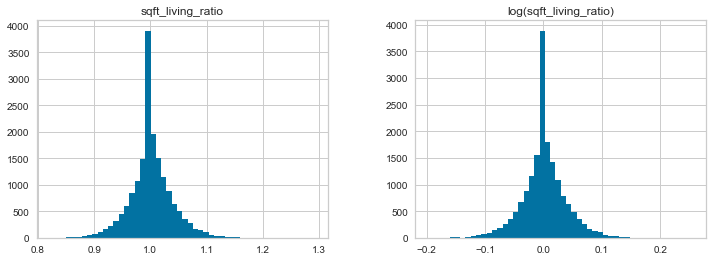

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

model_3_train.hist('sqft_living_ratio', ax = ax1, bins=50)

model_3_log = np.log(model_3_train['sqft_living_ratio'])
model_3_log.hist(ax = ax2, bins=50)

ax2.set_title('log(sqft_living_ratio)');

In [87]:
# Creating the log-transformed column
model_3_train['log_sqft_living_ratio'] = np.log(model_3_train['sqft_living_ratio'])
model_3_test['log_sqft_living_ratio'] = np.log(model_3_test['sqft_living_ratio'])

In [88]:
# Drop unnecessary columns from these dataframes
model_3_train = model_3_train.drop(['sqft_living','sqft_living15','sqft_living_ratio'], axis =1)

In [89]:
model_3_test = model_3_test.drop(['sqft_living','sqft_living15','sqft_living_ratio'], axis =1)

In [90]:
# Divide data in to x predictors and y targets 
X_train_3 = model_3_train.drop(['price_y'], axis=1)
y_train_3 = model_3_train[['price_y']]

X_test_3 = model_3_test.drop(['price_y'], axis=1)
y_test_3 = model_3_test[['price_y']]

In [91]:
# Train our scaler on training data, then fit to testing
X_train_3_scaled = scaler.fit_transform(X_train_3)
X_test_3_scaled = scaler.transform(X_test_3)

In [92]:
# Fit our model on our scaled data
lr.fit(X_train_3_scaled, y_train_3)

LinearRegression()

In [93]:
y_train_3_pred = lr.predict(X_train_3_scaled)
y_test_3_pred = lr.predict(X_test_3_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train_3, y_train_3_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_3, y_train_3_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test_3, y_test_3_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_3, y_test_3_pred)}")

Training Scores:
R2: 0.8023777345291427
Mean Absolute Error: 0.17654766868870625
---
Testing Scores:
R2: 0.8037440060304246
Mean Absolute Error: 0.1742813544491742


In [94]:
# Note: I will use the residuals for the training dataset
residuals_mod_3 = y_train_3 - y_train_3_pred

/Users/eldrichvergarciadoyogan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


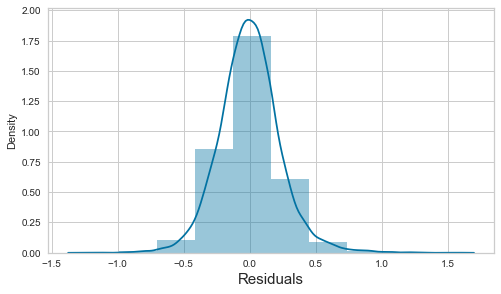

In [95]:
# Now plot the distribution of residuals
sns.distplot(residuals_mod_3, bins = 10)
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

In [96]:
X = X_train_3_scaled
y = y_train_3

model_3 = sm.OLS(y, sm.add_constant(X))

results_mod_3 = model_3.fit()

results_mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                price_y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     7789.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:26:08   Log-Likelihood:                 540.57
No. Observations:               17276   AIC:                            -1061.
Df Residuals:                   17266   BIC:                            -983.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0493      0.002   7311.522      0.000      13.046      13.053
x1             0.2663      0.002    129.547      0.000       0.262       0.270
x2             0.0092      0.002      4.073      0.000       0.005       0.014
x3             0.0938      0.003     31.680      0.000       0.088       0.100
x4             0.0380      0.002     19.185      0.000       0.034       0.042
x5             0.0242      0.002     10.298      0.000       0.020       0.029
x6             0.0197      0.002     10.197      0.000       0.016       0.024
x7             0.2280      0.003     84.980      0.000       0.223       0.233
x8            -0.1111      0.002    -45.956      0.000      -0.116      -0.106
x9             0.0378      0.002     17.280      0.000       0.034       0.042
==============================================================================
Omnibus:                     1157.675   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3482.043
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       5.092   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# printing column names again, because coefficients above are not identified by column names. 
X_train_3.head()

med_price_for_zip  bedrooms  bathrooms  sqft_lot  floors  condition  grade  \
0              12.49      0.69       0.56      9.66    0.00       1.10      6   
1              12.49      1.39       0.92      8.43    0.69       1.10      8   
2              12.49      1.61       0.56      9.07    0.00       1.10      7   
3              12.49      1.10       0.00      9.68    0.00       1.39      6   
4              12.49      1.39       0.56      9.39    0.00       1.61      6   

   yr_built  log_sqft_living_ratio  
0      7.59                  -0.03  
1      7.60                   0.01  
2      7.58                   0.02  
3      7.58                  -0.00  
4      7.57                   0.02

Probably most important is the fact that the constant value is much higher than any of the coefficient values. This implies that there are some factors influencing house price that are not accounted for in my model.

By far, median sales price for a home's zip code is the strongest predictor in this current model. Grade was the second most-powerful predictor. Going up one standard deviation with the zip code feature increased a home's price by almost 27%, while going up one standard deviation in condition can increase price by 23%.

Also noteworthy is the fact that a home's lot size as a standalone predictor seems to affect a home sales price about as much as the ratio of its square footage compared to that of its neighbors. This may tell us that lot size is not nearly as influential as interior square footage, as de-emphasizing the latter feature by combining the two square footage columns into one feature still resulted in a feature with equivalent influence as lot size. This also lends support to the idea that location is an important predictor, as the squarefootage/ratio feature implicitly took location into account.

## Future Work 